In [15]:
import xlwings as xw
wb = xw.Book()  # this will create a new workbook
wb = xw.Book('工作簿3.xlsx')  # connect to a file that is open or in the current working directory # 新打开的工作簿在存盘之前没有后缀
# wb = xw.Book(r'C:\path\to\file.xlsx')  # on Windows: use raw strings to escape backslashes

sheet = wb.sheets['Sheet1']

# sheet.range('A1').value = 'Foo 1'

# sheet.range('A1').value = [['Foo 1', 'Foo 2', 'Foo 3'], [10.0, 20.0, 30.0]]
# sheet.range('A1').expand().value
# [['Foo 1', 'Foo 2', 'Foo 3'], [10.0, 20.0, 30.0]]

import pandas as pd
# sheet.range('A1').value = df
sheet.range('A1').expand().value
dfcd = sheet.range('A1').options(pd.DataFrame, expand='table').value  # 必须加options，否则dfcd会自动加 [0, 1, 2...]这样的表头
dfcd


,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
ts_code,,,,,,,,,,
002841.SZ,20220512.0,73.49,76.32,73.06,74.87,74.34,0.53,0.7129,15699.47,118273.965
600036.SH,20220512.0,36.80,37.06,36.43,36.61,37.21,-0.60,-1.6125,630023.11,2309969.909
002841.SZ,20220511.0,73.37,76.35,73.07,74.34,73.62,0.72,0.9780,16186.68,121685.552
600036.SH,20220511.0,36.83,37.56,36.60,37.21,36.98,0.23,0.6220,872398.56,3245600.405
002841.SZ,20220510.0,72.01,74.53,71.34,73.62,72.72,0.90,1.2376,20238.37,148658.459
600036.SH,20220510.0,35.98,37.16,35.26,36.98,36.47,0.51,1.3984,1217637.35,4424738.771
002841.SZ,20220509.0,74.80,74.88,71.11,72.72,75.03,-2.31,-3.0788,19092.89,138708.395
600036.SH,20220509.0,37.80,37.82,36.15,36.47,37.91,-1.44,-3.7985,1252405.92,4603133.911


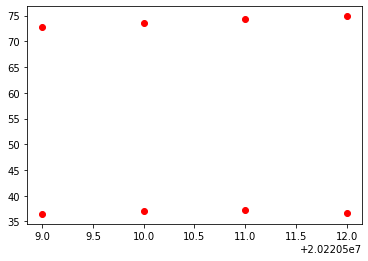

In [6]:

import matplotlib.pyplot as plt
plt.plot(dfcd.trade_date, dfcd.close, 'ro')
# plt.axis([0, 6, 0, 20])
plt.show()

In [12]:
dfcd.to_excel('工作簿3.xlsx')  # 保存，并手工改改格式、颜色。

In [13]:
dfcd

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
,,,,,,,,,,,
0.0,002841.SZ,20220512.0,73.49,76.32,73.06,74.87,74.34,0.53,0.7129,15699.47,118273.965
1.0,600036.SH,20220512.0,36.80,37.06,36.43,36.61,37.21,-0.60,-1.6125,630023.11,2309969.909
2.0,002841.SZ,20220511.0,73.37,76.35,73.07,74.34,73.62,0.72,0.9780,16186.68,121685.552
3.0,600036.SH,20220511.0,36.83,37.56,36.60,37.21,36.98,0.23,0.6220,872398.56,3245600.405
4.0,002841.SZ,20220510.0,72.01,74.53,71.34,73.62,72.72,0.90,1.2376,20238.37,148658.459
5.0,600036.SH,20220510.0,35.98,37.16,35.26,36.98,36.47,0.51,1.3984,1217637.35,4424738.771
6.0,002841.SZ,20220509.0,74.80,74.88,71.11,72.72,75.03,-2.31,-3.0788,19092.89,138708.395
7.0,600036.SH,20220509.0,37.80,37.82,36.15,36.47,37.91,-1.44,-3.7985,1252405.92,4603133.911


In [29]:
dfcd.trade_date = dfcd.trade_date.apply(lambda x: int(x)-10000000)

In [25]:
sheet.range('A1').options(pd.DataFrame, expand='table').value = dfcd   # 不加options也可以， 见下面一行。

In [30]:
sheet.range('A1').value = dfcd  # 直接覆盖值， 格式、颜色不变。